# pyecharts的作图方法与修饰逻辑

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from collections import Counter

## python的两种数据作图方案

* matplotlib 简单方便，适合数值作图与科学作图（论文发表）
* pyecharts 流程略微复杂但功能强大，图形为交互式，适合项目开发和商业分析报告(国人开发)；但是这个库的问题也在于是一个非常新的库，开发很不稳定~当前课件版本是pyecharts1.5，未来变化可能导致课件代码无法使用。


### 作图的通用流程

1，选择图的类型

2，导入图需要展示的数据

In [4]:
x=range(1,8)
y=[114, 55, 27, 101, 125, 27, 105]

<BarContainer object of 7 artists>

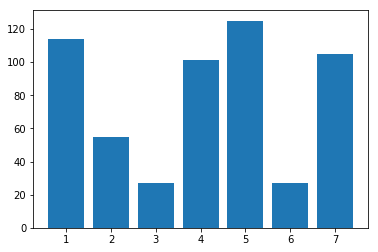

In [10]:
plt.bar(x,y)

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Bar

In [8]:
range(1,4)

range(1, 4)

In [17]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("iii", y)
bar.render_notebook()#用来在notebook中展示图形，使用render则会直接保存为html文件

## pyecharts的安装

* 就winpython来说，双击WinPython Command Prompt，会打开一个终端，在此终端中键入拷贝如下命令，并按回车：

pip  install  -i  https://pypi.doubanio.com/simple/  --trusted-host pypi.doubanio.com pyecharts

上面命令是用豆瓣源来进行包的安装

### pyecharts支持的代码格式

In [2]:
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Bar


def bar_base() -> Bar:
    c = (
        Bar()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .add_yaxis("商家B", Faker.values())
        .set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
    )
    return c

In [3]:
bar_base().render_notebook()

In [4]:
g1=Bar()
g1.add_xaxis(Faker.choose())
g1.add_yaxis("商家A", Faker.values())
g1.add_yaxis("商家B", Faker.values())
g1.set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
g1.render_notebook()

In [10]:
Bar().add_xaxis(list(x)).add_yaxis("name", y).render_notebook()#用来在notebook中展示图形，使用render则会直接保存为html文件

In [20]:
# pyecharts的链式写法
Bar().add_xaxis(list(x)).add_yaxis("name", y).render_notebook()

* 在线教程中的函数形式主要是项目开发中面向对象程序的书写习惯

In [15]:
Faker.choose()

['周一', '周二', '周三', '周四', '周五', '周六', '周日']

In [17]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
    .add_yaxis("商家B", [15, 6, 45, 20, 35, 66])
    .set_global_opts(title_opts=opts.TitleOpts(title="主标题", subtitle="副标题"))
)

In [5]:
from pyecharts.faker import Faker#这是用来产生伪数据的包

In [28]:
Faker.choose()

['哈士奇', '萨摩耶', '泰迪', '金毛', '牧羊犬', '吉娃娃', '柯基']

In [24]:
def bar_base() -> Bar:
    c = (
        Bar()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .add_yaxis("商家B", Faker.values())
        .set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
    )
    return c

In [29]:
bar_base().render_notebook()

## 课间题

* 如果带了自己电脑请在自己电脑上尝试安装pyecharts

* 请从pyecharts主页上复制一段代码下来，在notebook运行并正常显示出图片（注意避免运行带有JsCode函数的代码，这种似乎不行）

## pyecharts的图形修饰逻辑

* pyecharts的主页，也是最重要的学习资源： https://pyecharts.org/#/

### 全局配置项


* set_global_opts非常重要的修饰函数，负责图形大部分整体的修饰。

第一层次

* 下面是主页说明，注意这个说明和下面代码用法对比：

class TitleOpts(
    # 主标题文本，支持使用 \n 换行。
    title: Optional[str] = None,

In [ ]:
#bar.set_global_opts(toolbox_opts=opts.ToolboxOpts(title="Bar-渐变圆柱"))

In [9]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_global_opts(title_opts=opts.TitleOpts(title="Bar-渐变圆柱",title_link="https://blog.csdn.net/z18222043061/article/details/87882626"))
#注意对比这里修饰的方法与主页对应位置教程的说明，了解pyechart图形修饰模式:
#TitleOpts对应class TitleOpts中的类名，title_opts需要把TitleOpts中的title 小写
bar.render_notebook()

第二层次

* 坐标相关的设置

class AxisOpts(

    # 坐标轴刻度最大值。
    # 可以设置成特殊值 'dataMax'，此时取数据在该轴上的最大值作为最大刻度。
    # 不设置时会自动计算最大值保证坐标轴刻度的均匀分布。
    # 在类目轴中，也可以设置为类目的序数（如类目轴 data: ['类A', '类B', '类C'] 中，序数 2 表示 '类C'。
    # 也可以设置为负数，如 -3）。
 max_: Union[Numeric, str, None] = None,
 
 axisline_opts: Union[AxisLineOpts, dict, None] = None,
 
 axistick_opts: Union[AxisTickOpts, dict, None] = None,
 
 axislabel_opts: Union[LabelOpts, dict, None] = None,
 
 * 注意这些配置项的层次关系：set_global_opts-》xaxis_opts-》AxisOpts-》max_或是axislabel_opts等
 

In [16]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_global_opts(xaxis_opts=opts.AxisOpts(max_=6,axisline_opts=opts.AxisLineOpts(is_show=False)))#去掉bar的数字标识
bar.render_notebook()

## 课间题

* 请阅读class TitleOpts的配置项，在上面bar图中加入副标题，内容任意

* 请阅读DataZoomOpts：区域缩放配置项部分，在bar图中加入缩放条

* 请让y轴的上限为140

In [19]:
from pyecharts.charts import Bar
from pyecharts import options as opts
x=range(1,8)
y=[114, 55, 27, 101, 125, 27, 105]

bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_global_opts(title_opts=opts.TitleOpts(subtitle="ssssss"),datazoom_opts=opts.DataZoomOpts(is_show=True))#去掉bar的数字标识
bar.render_notebook()

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Bar

x=range(1,8)
y=[114, 55, 27, 101, 125, 27, 105]

bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("iii", y)
bar.set_global_opts(title_opts=opts.TitleOpts(subtitle="Bar-渐变圆柱"),
                    datazoom_opts=opts.DataZoomOpts(is_show=True),
                   yaxis_opts=opts.AxisOpts(max_=140))
#bar.set_global_opts()
bar.render_notebook()#用来在notebook中展示图形，使用render则会直接保存为html文件

## 系列配置项

* set_series_opts负责很多系列配置项的定义，比如 LabelOpts；MarkPointOpts；AreaStyleOpts

In [21]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))#去掉bar的数字标识
bar.render_notebook()

* 标记点的设定

class MarkPointOpts(
    # 标记点数据，参考 `series_options.MarkPointItem`
    data: Sequence[Union[MarkPointItem, dict]] = None,
    
class MarkPointItem(
    # 标注名称。
    name: Optional[str] = None,

    # 特殊的标注类型，用于标注最大值最小值等。可选:
    # 'min' 最大值。
    # 'max' 最大值。
    # 'average' 平均值。
    type_: Optional[str] = None,

In [24]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            ))#去掉bar的数字标识
bar.render_notebook()

* 有一些系列配置是放在其他地方的，这取决于此配置项用来修饰的对象。比如itemstyle_opts用来修饰bar的颜色时就放在add_yaxis里。要确定配置的使用位置，比如add_yaxsi这种函数包含哪些配置项建议先阅读每个图形最前面的，class说明

In [25]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y,itemstyle_opts=opts.ItemStyleOpts(color="pink"),)
bar.render_notebook()

* 有些配置需要在图形函数中配置，比如主题的设定

https://pyecharts.org/#/zh-cn/themes

In [26]:
from pyecharts.globals import ThemeType

In [28]:
#LIGHT DARK CHALK ESSOS PURPLE_PASSION
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.render_notebook()

## 课间题

In [39]:
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.ESSOS))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_series_opts(label_opts=opts.LabelOpts(font_style="italic",font_size=20),
                   markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="max",name="大大大"),
                                                         opts.MarkLineItem(type_="min",name="小小小")]))#去掉bar的数字标识
bar.set_global_opts(yaxis_opts=opts.AxisOpts(max_=135))
bar.render_notebook()

In [30]:
from pyecharts import options as opts
from pyecharts.charts import Bar

x=range(1,8)
y=[114, 55, 27, 101, 125, 27, 105]

bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.ESSOS))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_series_opts(label_opts=opts.LabelOpts(font_size=20,font_style="italic"),
            markline_opts=opts.MarkLineOpts(
                data=[
                    opts.MarkLineItem(type_="max", name="最大值"),
                    opts.MarkLineItem(type_="min", name="最小值"),
                    opts.MarkLineItem(type_="average", name="平均值"),
                ]
            ))#去掉bar的数字标识
bar.set_global_opts(yaxis_opts=opts.AxisOpts(max_=135))
bar.render_notebook()

In [24]:
#请尝试再上面bar作图中，引入ESSOS主题，并设置柱标为斜体，并这只字体大小为20
# 在bar作图中，请给图中的最大值，最小值，平均值位置做线标
#在全局设定中定义y轴的最大值为135

## pyecharts的数据类型问题

https://pyecharts.org/#/zh-cn/data_format

由于pyecharts背后封装的js库，会涉及到数据类型转化。它暂时要求输入数据必须是python的基础数据类型，比如字符串，列表，字典，而不能是序列这样的数据类型。因此序列输入量需要事先被转化为list等基础数据类型才能被pyecharts支持

In [40]:
op1=open(r'D:\try\shoes.json', 'r',encoding='utf-8')
li=[]
dict1={}
for i in op1:
    k=json.loads(i.encode("utf-8"))#把字符串转换为json
    li.append(k)
a=json_normalize(li)#把由json数据构成的列表转换成数据框

In [64]:
a.columns

Index(['_id.$oid', 'info.上市年份季节', 'info.上市时间', 'info.产品名称', 'info.低帮鞋品名',
       'info.功能', 'info.吊牌价', 'info.品牌', 'info.图案', 'info.场合', 'info.外底材料',
       'info.季节', 'info.尺码', 'info.帮面内里材质', 'info.帮面材质', 'info.性别',
       'info.是否商场同款', 'info.是否瑕疵', 'info.款号', 'info.款式', 'info.流行元素',
       'info.真皮材质工艺', 'info.细分风格', 'info.货号', 'info.跟底款式', 'info.运动系列',
       'info.运动鞋科技', 'info.适合路面', 'info.适用对象', 'info.销售渠道类型', 'info.闭合方式',
       'info.靴子品名', 'info.靴筒内里材质', 'info.靴筒材质', 'info.靴筒高度', 'info.鞋制作工艺',
       'info.鞋垫材质', 'info.鞋头款式', 'info.鞋底材质', 'info.鞋码', 'info.鞋跟高',
       'info.鞋面内里材质', 'info.鞋面材质', 'info.颜色分类', 'info.风格', 'itemid',
       'location', 'nick', 'price', 'sales', 'title', 'url'],
      dtype='object')

In [53]:
a.head(1)

,_id.$oid,info.上市年份季节,info.上市时间,info.产品名称,info.低帮鞋品名,info.功能,info.吊牌价,info.品牌,info.图案,info.场合,...,info.鞋面材质,info.颜色分类,info.风格,itemid,location,nick,price,sales,title,url
0,5aa77041be9b0338dc1faab4,2018年春季,NaN,NaN,商务休闲鞋,轻质,NaN,YEARCON/意尔康,纯色,日常,...,头层牛皮（除牛反绒）,黑色土黄,商务,562121114807,浙江 丽水,意尔康皮鞋旗舰店,269.00,1583人付款,意尔康男鞋2018春季新款英伦真皮商务休闲皮鞋青年男士皮鞋子男潮,http://detail.tmall.com/item.htm?id=5621211148...


In [42]:
p0=a.groupby("info.鞋面材质").size().sort_values(ascending=False)
p0

info.鞋面材质
头层牛皮（除牛反绒）    3470
PU             671
二层牛皮（除牛反绒）     605
人造革             80
超纤              35
多种材质拼接          21
绒面              15
磨砂皮             14
牛反绒             12
塑胶              10
太空革              9
二层猪皮             8
布                8
网布               7
头层猪皮             6
鳄鱼皮              4
牛仔布              2
超纤皮              1
棉布               1
羊皮毛一体            1
dtype: int64

In [45]:
p0.tolist()

[3470, 671, 605, 80, 35, 21, 15, 14, 12, 10, 9, 8, 8, 7, 6, 4, 2, 1, 1, 1]

In [47]:
bar = Bar()
bar.add_xaxis(p0.index.tolist())
bar.add_yaxis("商家A", p0.tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况"),toolbox_opts=opts.ToolboxOpts())
bar.render_notebook()

In [78]:
from pyecharts.charts import Page, Pie

In [70]:
[list(z) for z in zip(p0.index.tolist(), p0.tolist())]

[['头层牛皮（除牛反绒）', 3470],
 ['PU', 671],
 ['二层牛皮（除牛反绒）', 605],
 ['人造革', 80],
 ['超纤', 35],
 ['多种材质拼接', 21],
 ['绒面', 15],
 ['磨砂皮', 14],
 ['牛反绒', 12],
 ['塑胶', 10],
 ['太空革', 9],
 ['二层猪皮', 8],
 ['布', 8],
 ['网布', 7],
 ['头层猪皮', 6],
 ['鳄鱼皮', 4],
 ['牛仔布', 2],
 ['超纤皮', 1],
 ['棉布', 1],
 ['羊皮毛一体', 1]]

In [48]:
p0

info.鞋面材质
头层牛皮（除牛反绒）    3470
PU             671
二层牛皮（除牛反绒）     605
人造革             80
超纤              35
多种材质拼接          21
绒面              15
磨砂皮             14
牛反绒             12
塑胶              10
太空革              9
二层猪皮             8
布                8
网布               7
头层猪皮             6
鳄鱼皮              4
牛仔布              2
超纤皮              1
棉布               1
羊皮毛一体            1
dtype: int64

In [49]:
for i in zip([2,4],[4,7]):
    print(list(i))

[2, 4]
[4, 7]


In [79]:
f2=Pie().add("", [list(z) for z in zip(p0.index.tolist(), p0.tolist())])
f2.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
f2.set_global_opts(
            title_opts=opts.TitleOpts(title="Pie-Radius"),
            legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%"
            ),
        )
f2.render_notebook()

## 课间题

In [11]:
# 翻转bar图的x,y轴
p0=p0.sort_values()

In [64]:
# 做皮鞋材质数量分布的线图（Line）
from pyecharts.charts import Line

In [79]:
# 做皮鞋材质数量分布的漏斗图（Funnel）
from pyecharts.charts import Funnel, Page

In [6]:
# 做皮鞋材质分布的象形柱状图（PictorialBar）
from pyecharts.charts import Page, PictorialBar
from pyecharts.globals import SymbolType

In [3]:
# 求“info.鞋面内里材质”的各个材质的商品数量，请分别做bar,Line,Funnel,pie，PictorialBar 图来可视化此数据(注意数据类型转换)